# Assignment 4 - Trees

This project will delve into the world of decision trees and their ensemble counterparts. 

I am working with the breast cancer dataset to understand how these algorithms can be utilized for classification tasks, and also exploring the importance of feature selection and hyperparameter tuning.

## Tasks:

### 1. Data Loading and Exploration: (1 point)

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Part 1: Data Loading and Exploration
from sklearn.datasets import load_breast_cancer

# Load the dataset
"""
 Load Breast Cancer Dataset 
Using Scikit-learn's datasets module, load the breast cancer dataset.
"""

# Load the breast cancer dataset
data = load_breast_cancer()

# Assign feature data to X and target labels to y
X = data.data
y = data.target

# Display the shapes of X and y to confirm loading
print(f"Feature data shape: {X.shape}")
print(f"Target labels shape: {y.shape}")


Feature data shape: (569, 30)
Target labels shape: (569,)


### 2. Data Preprocessing (1 point)

In [3]:
# Part 2: Data Preprocessing
from sklearn.model_selection import train_test_split

"""
Dataset Preprocessing
Using the loaded breast cancer dataset, divide it into training and testing sets.
"""

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display the shapes of the training and testing sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (455, 30), (455,)
Testing set shape: (114, 30), (114,)


### 3. Decision Trees

Decision Tree Accuracy: 94.74%


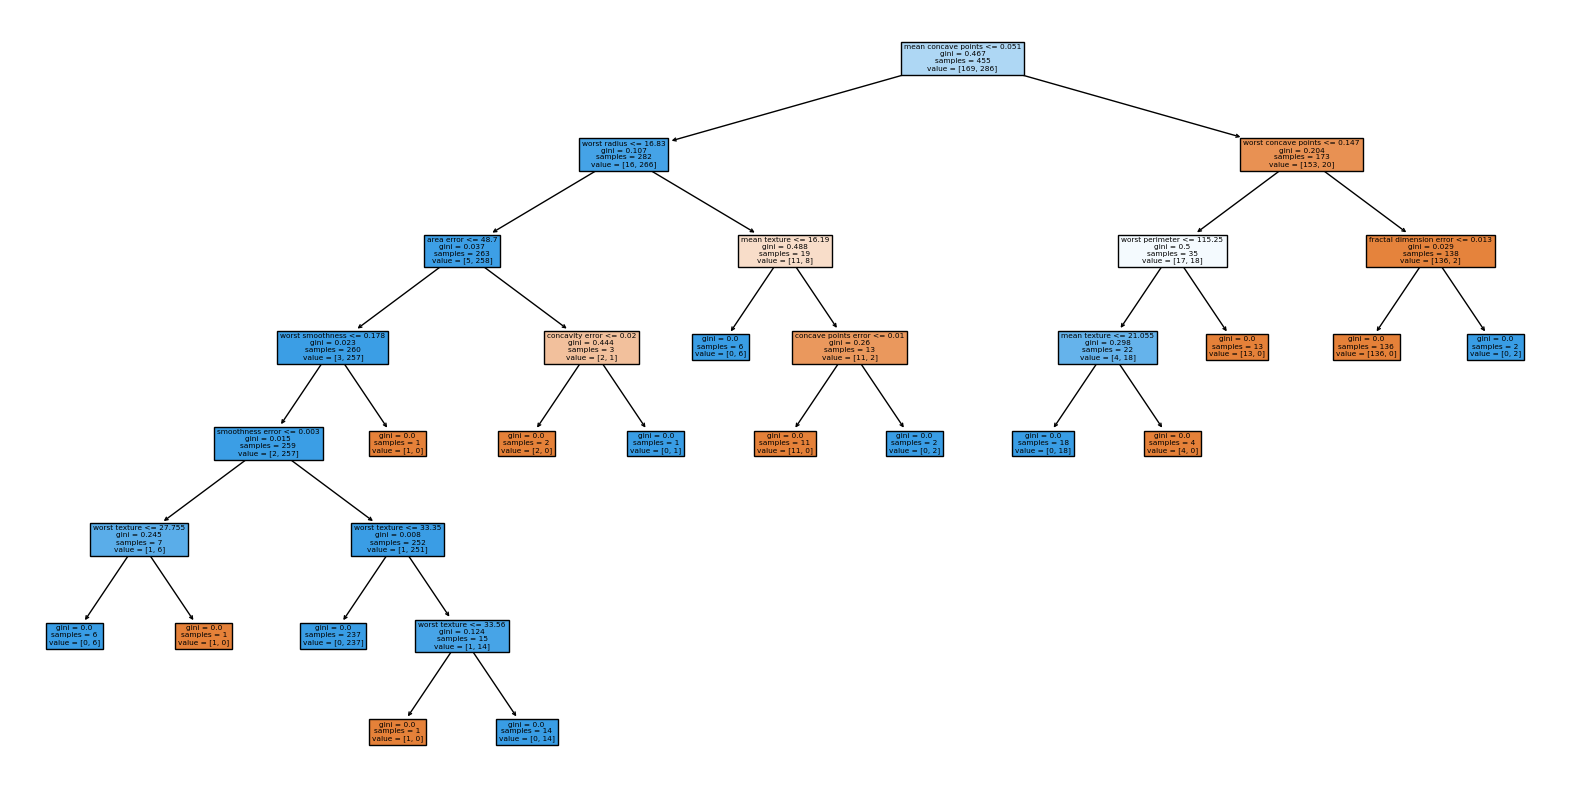

In [4]:
# Part 3: Decision Trees
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

"""
Question: Decision Trees Implementation (4 points)
Using the training data, implement a decision tree classifier and evaluate its accuracy on the testing data.
"""

# Initialize a DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the tree on the training data
dt.fit(X_train, y_train)

# Predict the labels of the testing data
y_pred = dt.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=data.feature_names)
plt.show()


### 4. Random Forest (8 points)

In [6]:
# Part 4: Random Forest
from sklearn.ensemble import RandomForestClassifier

"""
Question: Random Forest Implementation (4 points)
Using the training data, implement a random forest classifier and evaluate its accuracy on the testing data.
"""

# Initialize a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Fit the random forest on the training data
rf.fit(X_train, y_train)

# Predict the labels of the testing data
y_pred = rf.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

# Feature importances

"""
 Feature Importance Analysis 
Using the trained Random Forest model, analyze and list down the importance of features in descending order.
"""

# Get feature importances from the trained Random Forest model
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {data.feature_names[indices[f]]} ({importances[indices[f]]:.4f})")


Random Forest Accuracy: 96.49%
Feature ranking:
1. worst area (0.1539)
2. worst concave points (0.1447)
3. mean concave points (0.1062)
4. worst radius (0.0780)
5. mean concavity (0.0680)
6. worst perimeter (0.0671)
7. mean perimeter (0.0533)
8. mean radius (0.0487)
9. mean area (0.0476)
10. worst concavity (0.0318)
11. area error (0.0224)
12. worst texture (0.0217)
13. worst compactness (0.0203)
14. radius error (0.0201)
15. mean compactness (0.0139)
16. mean texture (0.0136)
17. perimeter error (0.0113)
18. worst smoothness (0.0106)
19. worst symmetry (0.0101)
20. concavity error (0.0094)
21. mean smoothness (0.0073)
22. fractal dimension error (0.0053)
23. compactness error (0.0053)
24. worst fractal dimension (0.0052)
25. texture error (0.0047)
26. smoothness error (0.0043)
27. symmetry error (0.0040)
28. mean fractal dimension (0.0039)
29. mean symmetry (0.0038)
30. concave points error (0.0035)


 XGBoost 

In [8]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.1/124.9 MB 653.6 kB/s eta 0:03:11
   ---------------------------------------- 0.2/124.9 MB 1.1 MB/s eta 0:01:49
   ---------------------------------------- 0.6/124.9 MB 3.4 MB/s eta 0:00:37
    --------------------------------------- 2.4/124.9 MB 9.7 MB/s eta 0:00:13
   - -------------------------------------- 4.3/124.9 MB 15.4 MB/s eta 0:00:08
   -- ------------------------------------- 7.8/124.9 MB 22.7 MB/s eta 0:00:06
   --- ------------------------------------ 10.4/124.9 MB 38.5 MB/s eta 0:00:03
   ---- ----------------------------------- 13.2/124.9 MB 59.8 MB/s eta 0:00:02
   ---- ----------------------------------- 15.3/124.9 MB 59.5 MB/s eta 0:00:02
   ----- ---------------------------------- 17.2/124.9 MB 54.4 MB/

In [9]:
# Part 5: XGBoost
import xgboost as xgb

"""
 Implementing XGBoost 
Using the XGBoost library, train a classifier on the training data and evaluate its accuracy on the test set.
"""

# Initialize the XGBoost classifier
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Predict the labels for the test set using the trained model
y_pred = clf.predict(X_test)

# Evaluate and print the accuracy of the predictions against the true test labels
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")


XGBoost Accuracy: 95.61%


C:\Users\aishw\anacon\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:28:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### 6. Hyperparameter Tuning (2 points)

In [10]:

from sklearn.model_selection import GridSearchCV

"""
Question: Hyperparameter Tuning for Random Forest (4 points)
Using the provided param_grid for hyperparameters, apply Grid Search to find the optimal hyperparameters for a Random Forest classifier.
"""

# For this assignment, we'll only tune for Random Forest here
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define GridSearchCV with cv=5
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the GridSearch on the training data
grid_search.fit(X_train, y_train)

# Find the best estimator
best_rf = grid_search.best_estimator_

# Predict the labels for the test set using the optimized Random Forest model
y_pred = best_rf.predict(X_test)

# Evaluate and print the accuracy of the predictions against the true test labels
print(f"Optimized Random Forest Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Optimized Random Forest Accuracy: 96.49%
